<a href="https://colab.research.google.com/github/MoMassEg/AI-Capstone-Project-with-Deep-Learning-IBM-/blob/main/ai_color_based_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

image = plt.imread('/content/photo.jpg')
print(f"Image loaded successfully with shape: {image.shape}")

Image loaded successfully with shape: (612, 612, 3)


In [ ]:
import numpy as np

red_pixels = np.array([
    [255, 0, 0],
    [200, 0, 0],
    [255, 50, 50],
    [180, 0, 0],
    [255, 20, 20]
])

white_pixels = np.array([
    [255, 255, 255],
    [240, 240, 240],
    [230, 230, 230],
    [250, 250, 250],
    [245, 245, 245]
])

black_pixels = np.array([
    [0, 0, 0],
    [10, 10, 10],
    [20, 20, 20],
    [5, 5, 5],
    [15, 15, 15]
])

X_train = np.vstack((red_pixels, white_pixels, black_pixels))

y_train = np.array([
    0, 0, 0, 0, 0,
    1, 1, 1, 1, 1,
    2, 2, 2, 2, 2
])

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print("Training data (X_train) and labels (y_train) created successfully.")

Shape of X_train: (15, 3)
Shape of y_train: (15,)
Training data (X_train) and labels (y_train) created successfully.


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

print("Gaussian Naive Bayes classifier trained successfully.")

Gaussian Naive Bayes classifier trained successfully.


In [ ]:
height, width, channels = image.shape
image_2d = image.reshape(-1, 3)
print(f"Original image shape: {image.shape}")
print(f"Reshaped image_2d shape: {image_2d.shape}")
print("Image reshaped successfully for prediction.")

Original image shape: (612, 612, 3)
Reshaped image_2d shape: (374544, 3)
Image reshaped successfully for prediction.


In [ ]:
predicted_labels = gnb.predict(image_2d)

print(f"Shape of predicted_labels: {predicted_labels.shape}")
print("Pixels classified successfully.")

Shape of predicted_labels: (374544,)
Pixels classified successfully.


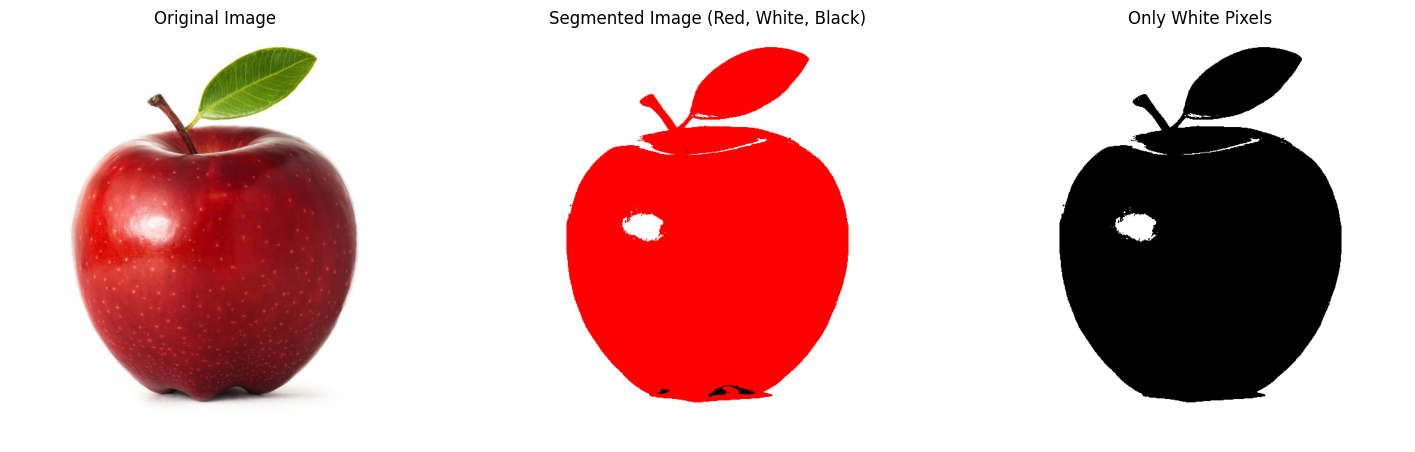

Original, segmented, and white-filtered images displayed successfully.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

color_map = {
    0: [255, 0, 0],
    1: [255, 255, 255],
    2: [0, 0, 0]
}

segmented_image = np.zeros((height, width, channels), dtype=np.uint8)

segmented_image_flat = np.array([color_map[label] for label in predicted_labels], dtype=np.uint8)
segmented_image = segmented_image_flat.reshape(height, width, channels)

white_filter_image = np.zeros((height, width, channels), dtype=np.uint8)
white_filter_image_flat = np.array([color_map[label] if label == 1 else [0, 0, 0] for label in predicted_labels], dtype=np.uint8)
white_filter_image = white_filter_image_flat.reshape(height, width, channels)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image (Red, White, Black)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(white_filter_image)
plt.title('Only White Pixels')
plt.axis('off')

plt.show()

print("Original, segmented, and white-filtered images displayed successfully.")